In [17]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
df = pd.read_csv("/kaggle/input/hr-comma-sep-csv/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
df.shape

(14999, 10)

In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [22]:
# Numerical columns vs left
num_cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
df.groupby('left')[num_cols].mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
left,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032
1,0.440098,0.718113,3.855503,207.419210,3.876505


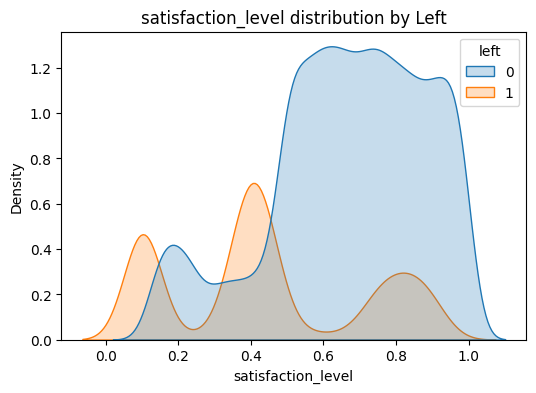

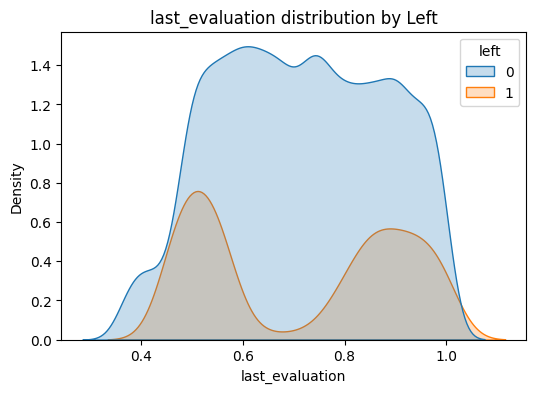

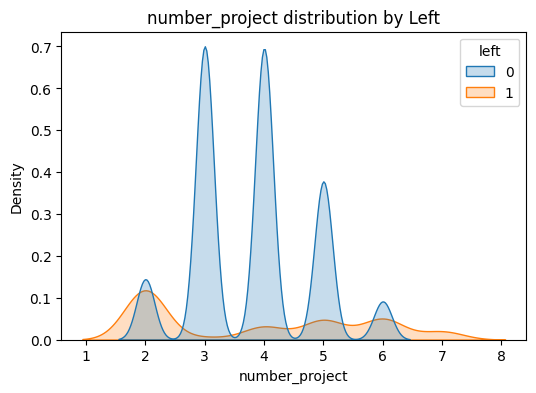

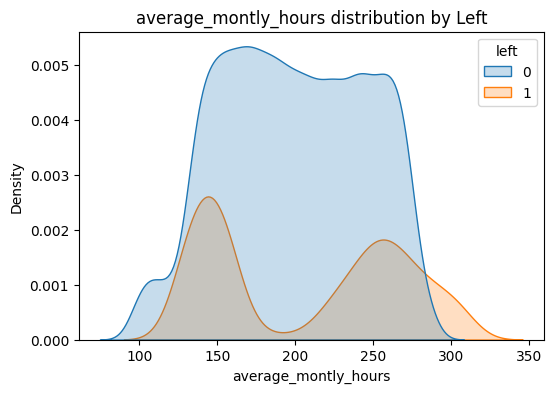

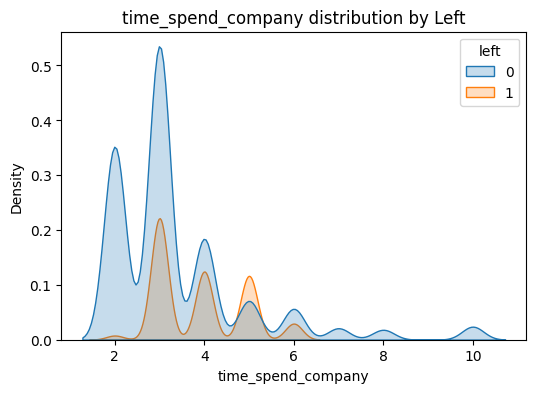

In [23]:
# Visualization of Num_cols vs left(attrition)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='left', fill=True)
    plt.title(f"{col} distribution by Left")
    plt.show()

In [24]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

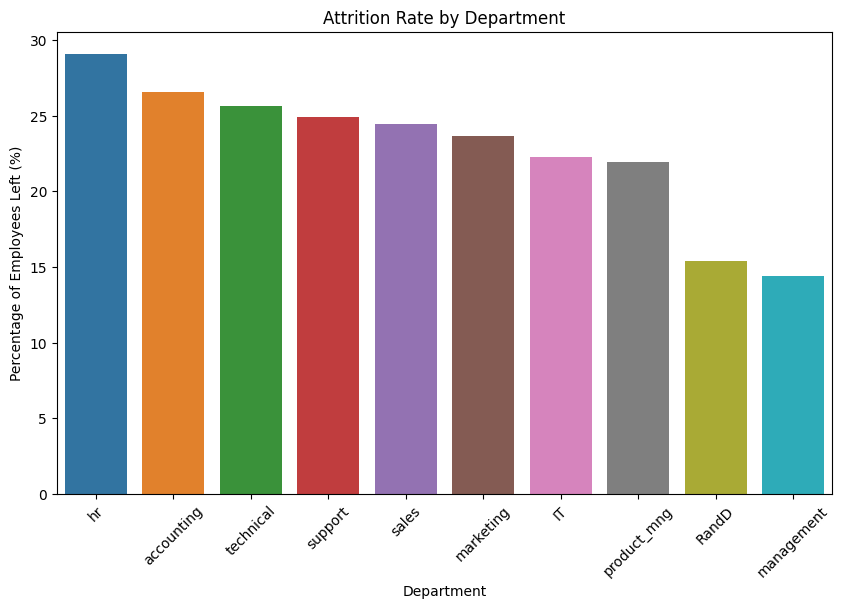

In [25]:
# Percentage of employees left in each department
dept_left_pct = pd.crosstab(df['Department'], df['left'], normalize='index') * 100

# Only show % of people who left (left=1)
dept_left_pct = dept_left_pct[1].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=dept_left_pct.index, y=dept_left_pct.values)
plt.xticks(rotation=45)
plt.ylabel("Percentage of Employees Left (%)")
plt.title("Attrition Rate by Department")
plt.show()

In [26]:
df.groupby(['salary','left'])['satisfaction_level'].mean()

pd.crosstab(df['salary'], df['left'], normalize='index') * 100

left,0,1
salary,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [27]:
time_attrition = pd.crosstab(df['time_spend_company'], df['left'], normalize='index') * 100
time_attrition = time_attrition[1]   # % of employees who left
print(time_attrition)

df['hours_bin'] = pd.cut(df['average_montly_hours'], bins=[80,120,160,200,250,310], 
                         labels=['80-120','121-160','161-200','201-250','251-310'])

hours_attrition = pd.crosstab(df['hours_bin'], df['left'], normalize='index') * 100
hours_attrition = hours_attrition[1]
print(hours_attrition)

project_attrition = pd.crosstab(df['number_project'], df['left'], normalize='index') * 100
project_attrition = project_attrition[1]
print(project_attrition)

promotion_attrition = pd.crosstab(df['promotion_last_5years'], df['left'], normalize='index') * 100
promotion_attrition = promotion_attrition[1]
print(promotion_attrition)

time_spend_company
2      1.633785
3     24.615862
4     34.806414
5     56.551256
6     29.108635
7      0.000000
8      0.000000
10     0.000000
Name: 1, dtype: float64
hours_bin
80-120      0.000000
121-160    39.939102
161-200     2.575377
201-250    15.750059
251-310    38.788257
Name: 1, dtype: float64
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
Name: 1, dtype: float64
promotion_last_5years
0    24.196185
1     5.956113
Name: 1, dtype: float64


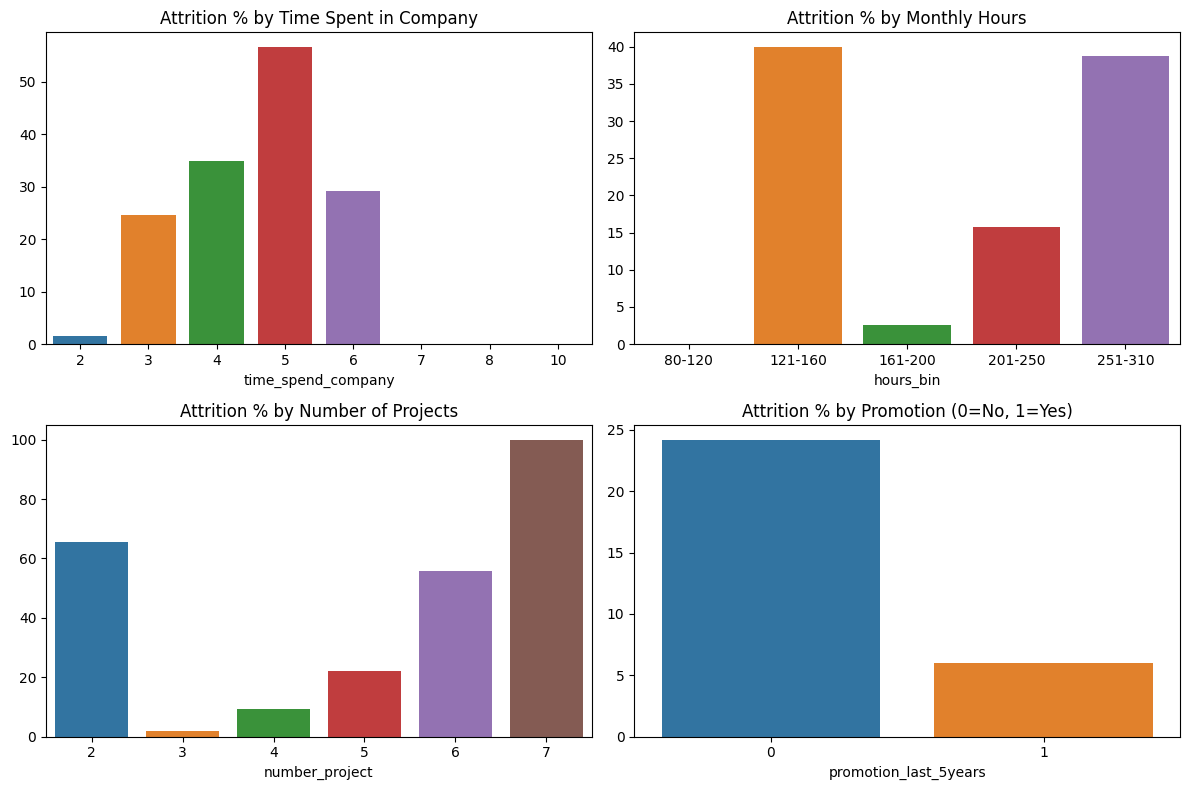

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(x=time_attrition.index, y=time_attrition.values, ax=axes[0,0])
axes[0,0].set_title("Attrition % by Time Spent in Company")

sns.barplot(x=hours_attrition.index, y=hours_attrition.values, ax=axes[0,1])
axes[0,1].set_title("Attrition % by Monthly Hours")

sns.barplot(x=project_attrition.index, y=project_attrition.values, ax=axes[1,0])
axes[1,0].set_title("Attrition % by Number of Projects")

sns.barplot(x=promotion_attrition.index, y=promotion_attrition.values, ax=axes[1,1])
axes[1,1].set_title("Attrition % by Promotion (0=No, 1=Yes)")

plt.tight_layout()
plt.show()

In [29]:
dept_promo = pd.crosstab(df['Department'], df['promotion_last_5years'], normalize='index') * 100

# Extract only promotion % (promotion = 1) and sort descending
dept_promo_sorted = dept_promo[1].sort_values(ascending=False)

print(dept_promo_sorted)

Department
management     10.952381
marketing       5.011655
RandD           3.430750
sales           2.415459
hr              2.029770
accounting      1.825293
technical       1.029412
support         0.897263
IT              0.244499
product_mng     0.000000
Name: 1, dtype: float64


In [30]:
# Promotion % by department
dept_promo = pd.crosstab(df['Department'], df['promotion_last_5years'], normalize='index') * 100

# Attrition % by department
dept_attrition = pd.crosstab(df['Department'], df['left'], normalize='index') * 100

# Combine into one table
dept_summary = pd.DataFrame({
    'Promotion %': dept_promo[1],
    'Attrition %': dept_attrition[1]
}).sort_values('Attrition %', ascending=False)

print(dept_summary)

             Promotion %  Attrition %
Department                           
hr              2.029770    29.093369
accounting      1.825293    26.597132
technical       1.029412    25.625000
support         0.897263    24.899058
sales           2.415459    24.492754
marketing       5.011655    23.659674
IT              0.244499    22.249389
product_mng     0.000000    21.951220
RandD           3.430750    15.374841
management     10.952381    14.444444


In [31]:
# Crosstab to calculate promotion rates
dept_promo = pd.crosstab(df['Department'], df['promotion_last_5years'], normalize='index') * 100

# Only promotion % (promotion=1)
dept_promo_pct = dept_promo[1].sort_values(ascending=False)

print(dept_promo_pct)


Department
management     10.952381
marketing       5.011655
RandD           3.430750
sales           2.415459
hr              2.029770
accounting      1.825293
technical       1.029412
support         0.897263
IT              0.244499
product_mng     0.000000
Name: 1, dtype: float64


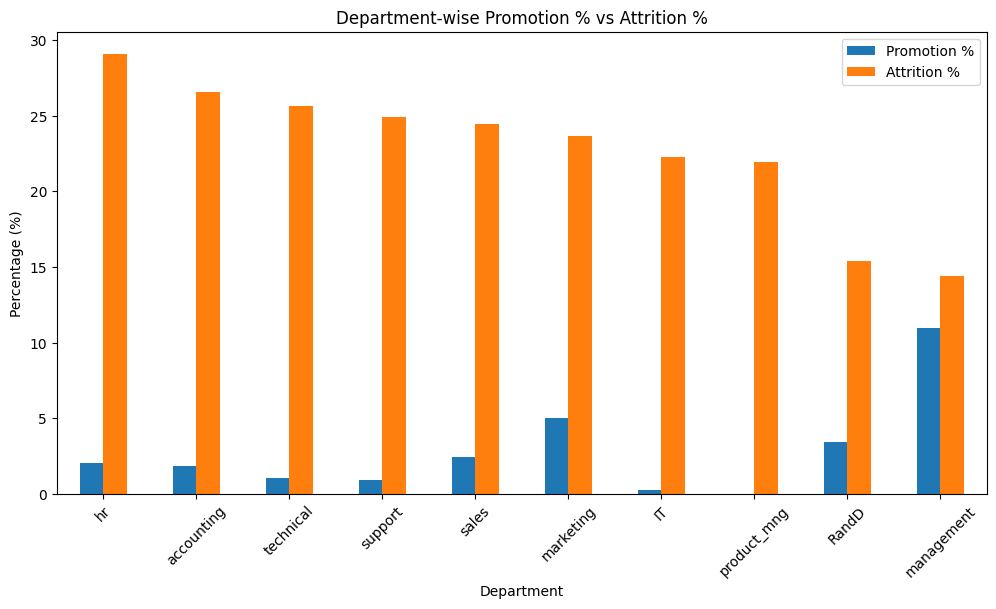

In [32]:
dept_summary.plot(kind='bar', figsize=(12,6))
plt.title("Department-wise Promotion % vs Attrition %")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

**Insights**
1. Employees staying 2–3 years are most likely to leave, indicating early career attrition.
2. Both underworked (low hours) and overworked (very high hours) employees show higher attrition, suggesting the need for balanced workloads.
3. Attrition is highest for employees with too few (2) or too many (6–7) projects, while those handling 3–5 projects are most stable.
4. Employees without promotions in the last 5 years have significantly higher attrition, emphasizing the importance of career advancement opportunities.
5. Departments with very low promotion % (like Support, Sales, HR) usually show higher attrition,
departments with slightly better promotion % (like Management, Technical) may have lower attrition.
This highlights a negative relationship between promotions and attrition across departments.